#Mamadou DIOUF

#Mathematics and Computer Science M2 Track, UPEC & UGE

#Advanced Data science course project

#Diffusion Schrödinger Bridge with Applications to Score-Based Generative Modeling

In [ ]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
!pip install torch torchvision matplotlib numpy tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

# Hyperparameters
batch_size = 128
image_size = 28 * 28  # Flatten MNIST images
L = 3  # Number of DSB iterations
N = 10  # Time steps
gamma_k = 0.05  # Noise level

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])  # Flatten images
mnist_train = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
mnist_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

# Define prior distribution (Gaussian noise)
def sample_prior(batch_size):
    return torch.randn(batch_size, image_size)  # Standard normal noise


100%|██████████| 9.91M/9.91M [00:00<00:00, 43.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.96MB/s]


In [ ]:
# Define neural networks for forward (F) and backward (B) processes
class ForwardNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 512), nn.ReLU(),
            nn.Linear(512, 512), nn.ReLU(),
            nn.Linear(512, image_size)
        )

    def forward(self, k, x):
        return self.model(x)

class BackwardNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 512), nn.ReLU(),
            nn.Linear(512, 512), nn.ReLU(),
            nn.Linear(512, image_size)
        )

    def forward(self, k, x):
        return self.model(x)


In [ ]:
# Loss functions (Mean Squared Error)
def loss_B(Xk, Xk1, Fk, Bk):
    """ Loss function for backward process """
    return ((Bk - (Xk + Fk - Xk1))**2).mean()

def loss_F(Xk, Xk1, Bk, Fk):
    """ Loss function for forward process """
    return ((Fk - (Xk1 - Xk - Bk))**2).mean()


In [ ]:
# Initialize models and optimizers
F_alpha = ForwardNet()
B_beta = BackwardNet()

optimizer_F = optim.Adam(F_alpha.parameters(), lr=1e-3)
optimizer_B = optim.Adam(B_beta.parameters(), lr=1e-3)

# Training loop
for n in range(L):
    print(f"Iteration {n+1}/{L}")

    # Train Backward Model
    for _ in range(2):  # Number of iterations until convergence
        for batch in mnist_loader:
            X0 = batch[0]  # MNIST images
            Xk = X0
            for k in range(N):
                Z = torch.randn_like(Xk)  # Gaussian noise
                Xk1 = F_alpha(k, Xk) + torch.sqrt(torch.tensor(2 * gamma_k)) * Z  # Forward step

                # Compute loss and update B_beta
                Bk = B_beta(k, Xk)
                loss_B_value = loss_B(Xk, Xk1, F_alpha(k, Xk), Bk)
                optimizer_B.zero_grad()
                loss_B_value.backward()
                optimizer_B.step()

    # Train Forward Model
    for _ in range(2):  # Number of iterations until convergence
        for _ in range(len(mnist_loader)):  # Sample same number of batches
            XN = sample_prior(batch_size)  # Prior samples
            Xk = XN
            for k in reversed(range(N)):
                Z = torch.randn_like(Xk)  # Gaussian noise
                Xk1 =  B_beta(k, Xk) + torch.sqrt(torch.tensor(2 * gamma_k)) * Z  # Backward step

                # Compute loss and update F_alpha
                Fk = F_alpha(k, Xk)
                loss_F_value = loss_F(Xk, Xk1, B_beta(k, Xk), Fk)
                optimizer_F.zero_grad()
                loss_F_value.backward()
                optimizer_F.step()

# The trained models F_alpha and B_beta now define the learned Schrödinger Bridge!
print("Training Complete!")


Iteration 1/3
Iteration 2/3
Iteration 3/3
Training Complete!


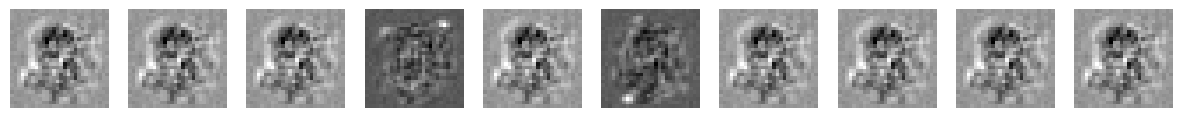

In [ ]:
# Function to generate MNIST-like images from noise
def generate_samples(num_samples=10):
    X = sample_prior(num_samples)  # Start from prior
    for k in reversed(range(N)):
        Z = torch.randn_like(X)
        X = B_beta(k, X) + torch.sqrt(torch.tensor(2 * 0.005)) * Z  # Reverse process

    return X

# Generate and display samples
samples = generate_samples(10).detach().numpy().reshape(-1, 28, 28)

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(samples[i], cmap="gray")
    ax.axis("off")
plt.show()


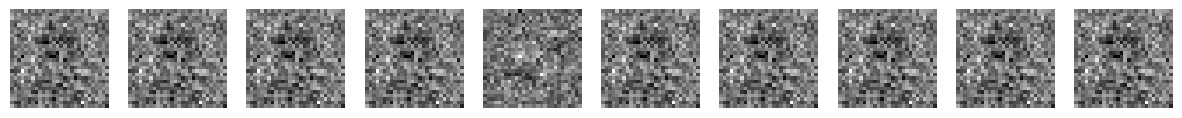

In [ ]:

X= generate_samples(10)
for k in reversed(range(N)):
      Z = torch.randn_like(X)
      X =X-F_alpha(k, X) - torch.sqrt(torch.tensor(2 * gamma_k)) * Z  # Reverse process
s=X.detach().numpy().reshape(-1, 28, 28)
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(s[i], cmap="gray")
    ax.axis("off")
plt.show()

In [ ]:
import torchvision
from torchvision import transforms
import torch
import numpy as np
transforms_list = [
    transforms.Pad(2, fill=0),  # left and right 2+2=4 padding
    transforms.ToTensor(),
    transforms.Lambda(lambda t: (t * 2) - 1)
]

mnist_ds = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transforms.Compose(transforms_list))
images = np.array(torch.cat([mnist_ds[i][0] for i in range(1000)]))

100%|██████████| 9.91M/9.91M [00:10<00:00, 909kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.62MB/s]


In [ ]:
x_train = torch.stack([mnist_ds[i][0] for i in range(len(mnist_ds))])
y_train = torch.tensor([mnist_ds[i][1] for i in range(len(mnist_ds))])



In [ ]:
x_train.shape

torch.Size([60000, 1, 32, 32])

In [ ]:
ind2=[]
for i in range(10):
  j=np.where(y_train==i)[0][:10]
  ind2.append(j)
index=np.array(ind2).reshape(1,100)[0]
y_train2=y_train[index]

In [ ]:
data = images[index]

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 100
image_size = 32  # MNIST image size (28x28)
L = 5  # Number of DSB iterations
N = 10  # Time steps
gamma_k = 0.05  # Noise level

# Load and preprocess MNIST
#
# Define prior distribution (Gaussian noise)
def sample_prior(batch_size):
    return np.random.randn(batch_size, image_size, image_size, 1).astype(np.float32)

# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(100).batch(100)


In [ ]:
def conv_block(x, filters):
    """Convolutional block: Conv + BatchNorm + ReLU"""
    x = keras.layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    return x

def unet_model():
    """U-Net model for diffusion process"""
    inputs = keras.Input(shape=(image_size, image_size, 1))

    # Encoder
    c1 = conv_block(inputs, 32)
    p1 = keras.layers.MaxPooling2D((2, 2))(c1)
    c2 = conv_block(p1, 64)
    p2 = keras.layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b = conv_block(p2, 128)

    # Decoder
    u1 = keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same")(b)
    u1 = keras.layers.Concatenate()([u1, c2])
    c3 = conv_block(u1, 64)

    u2 = keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding="same")(c3)
    u2 = keras.layers.Concatenate()([u2, c1])
    c4 = conv_block(u2, 32)

    outputs = keras.layers.Conv2D(1, (1, 1), activation="linear")(c4)  # No activation for regression

    return keras.Model(inputs, outputs)

# Create forward (F_alpha) and backward (B_beta) models
F_alpha = unet_model()
B_beta = unet_model()

# Optimizers
optimizer_F = keras.optimizers.Adam(learning_rate=1e-3)
optimizer_B = keras.optimizers.Adam(learning_rate=1e-3)


In [ ]:
# Loss functions (Mean Squared Error)
def loss_B(Xk, Xk1, Fk, Bk):
    """ Loss function for backward process """
    return tf.reduce_mean(tf.square(Bk - (Xk + Fk - Xk1)))

def loss_F(Xk, Xk1, Bk, Fk):
    """ Loss function for forward process """
    return tf.reduce_mean(tf.square(Fk - (Xk1 - Xk - Bk)))


In [ ]:
loss_Bs=[]
loss_Fs=[]
# Training Loop
for n in range(L):
    print(f"Iteration {n+1}/{L}")

    # Train Backward Model
    for epoch in range(1):  # Iterate once per DSB step
        for X0 in train_dataset:
            Xk = X0
            Xk = tf.expand_dims(Xk, axis=-1)
            for k in range(N):  # Forward diffusion process
                Z = tf.random.normal(shape=tf.shape(Xk))  # Gaussian noise
                Xk1 = Xk + F_alpha(Xk) + tf.sqrt(2 * gamma_k) * Z  # Forward step

            # Compute loss and update B_beta
            with tf.GradientTape() as tape:
                Bk = B_beta(Xk)
                loss_B_value = loss_B(Xk, Xk1, F_alpha(Xk), Bk)
                loss_Bs.append(loss_B_value)
            grads_B = tape.gradient(loss_B_value, B_beta.trainable_variables)
            optimizer_B.apply_gradients(zip(grads_B, B_beta.trainable_variables))

    # Train Forward Model
    for epoch in range(1):
        for _ in range(len(x_train) // batch_size):  # Sample same number of batches
            XN = sample_prior(batch_size)  # Prior samples
            Xk = XN
            for k in reversed(range(N)):  # Reverse diffusion process
                Z = tf.random.normal(shape=tf.shape(Xk))  # Gaussian noise
                Xk1 = Xk + B_beta(Xk) + tf.sqrt(2 * gamma_k) * Z  # Backward step

            # Compute loss and update F_alpha
            with tf.GradientTape() as tape:
                Fk = F_alpha(Xk)
                loss_F_value = loss_F(Xk, Xk1, B_beta(Xk), Fk)
                loss_Fs.append(loss_F_value)
            grads_F = tape.gradient(loss_F_value, F_alpha.trainable_variables)
            optimizer_F.apply_gradients(zip(grads_F, F_alpha.trainable_variables))

print("Training Complete!")


Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Training Complete!


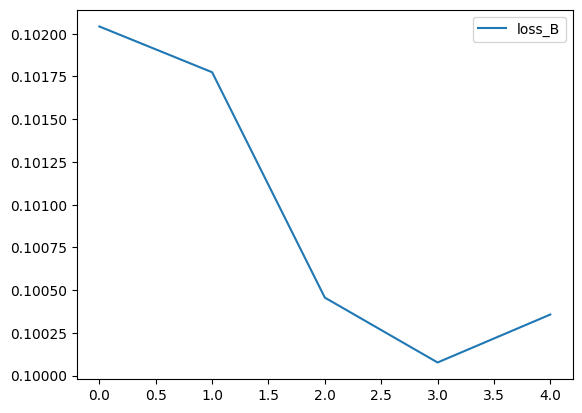

In [ ]:

plt.plot(loss_Bs)
plt.legend(['loss_B'])
plt.show()

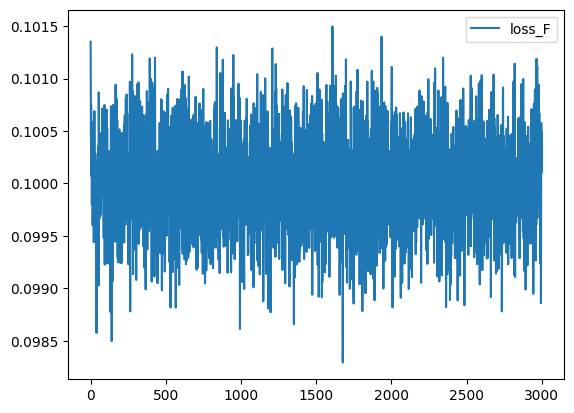

In [ ]:
plt.plot(loss_Fs)
plt.legend(['loss_F'])
plt.show()

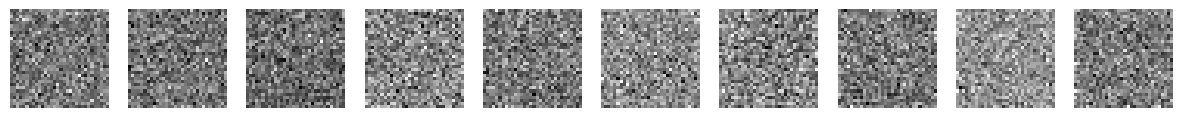

In [ ]:
# Function to generate MNIST-like images from noise
def generate_samples(num_samples=10):
    X = sample_prior(num_samples)  # Start from Gaussian noise
    for k in reversed(range(N)):
        Z = tf.random.normal(shape=tf.shape(X))
        X = B_beta(X) + tf.sqrt(2 * gamma_k) * Z  # Reverse process
    return X

# Generate and display samples
samples = generate_samples(10).numpy().reshape(-1, 32, 32)

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(samples[i], cmap="gray")
    ax.axis("off")
plt.show()